# 分析Framingham資料，判斷病人10年內罹患心血管疾病的機率及其罹患心血管疾病最可能的三大特徵

## 流程思考：

1. 先對 framingham.csv 檔案進行初步的資料檢閱
2. 了解各Column 的意義
3. 缺失值處理
4. Encoding categorical data （觀察此表格已經是數字了）
5. 特徵觀察

### 載入資料，並觀察

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv('framingham.csv')


先檢視前10筆資料的樣貌

In [3]:
dataset.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


就表頭字面上來看

| **欄位名稱**        | **字面意義** |
|:---------------:|:---------:|
| male            | 是否為男性     |
| age             | 年齡        |
| education       | 教育程度      |
| currentSmoker   | 最近是否吸菸    |
| cigsPerDay      | 每天抽幾根菸    |
| BPMeds          | 服用血壓藥物    |
| prevalentStroke | 中風        |
| prevalentHyp    | 高血壓       |
| diabetes        | 糖尿病       |
| totChol         | 總膽固醇      |
| sysBP           | 心臟收縮壓     |
| diaBP           | 舒張壓       |
| BMI             | BMI       |
| heartRate       | 心率        |
| glucose         | 血糖        |
| TenYearCHD      | 心血管疾病風險   |


以Pandas 中 Dataframe.info()函式可以顯示資料表內所有欄位的資訊。包含:欄位名稱、非虛值的數目、欄位的資料類型等等。

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
# 對所有欄位執行 describe 
dataset.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


雖然還沒有轉成"category"型態，但從上面檢視可以發現，應變量 「TenYearCHD」中位數、第三四分位數是0，表示大多數資料均為「0」。<br>
在後續訓練模型時，要格外注意預測資料的偏態性，可能會造成specificity 高，但 Sensivity (Recall) 和 Precision 低。

Class 0: 3594
Class 1: 644
Proportion: 5.58 : 1


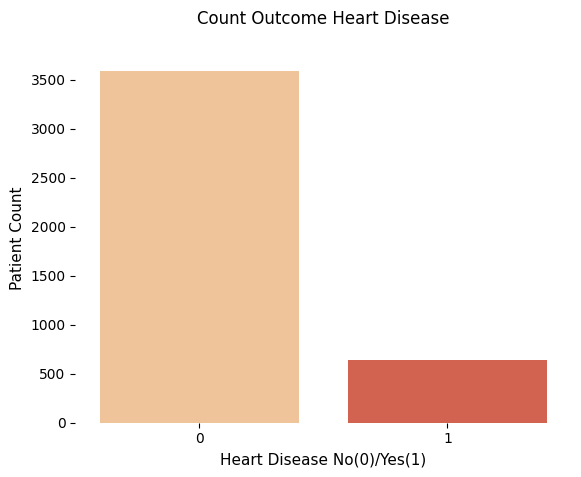

In [6]:
import seaborn as sns
target_count = dataset.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(x=dataset["TenYearCHD"], palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No(0)/Yes(1)',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show()

C:\Users\Tibame_T14\AppData\Local\Temp\ipykernel_12456\3529580095.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax = ax)


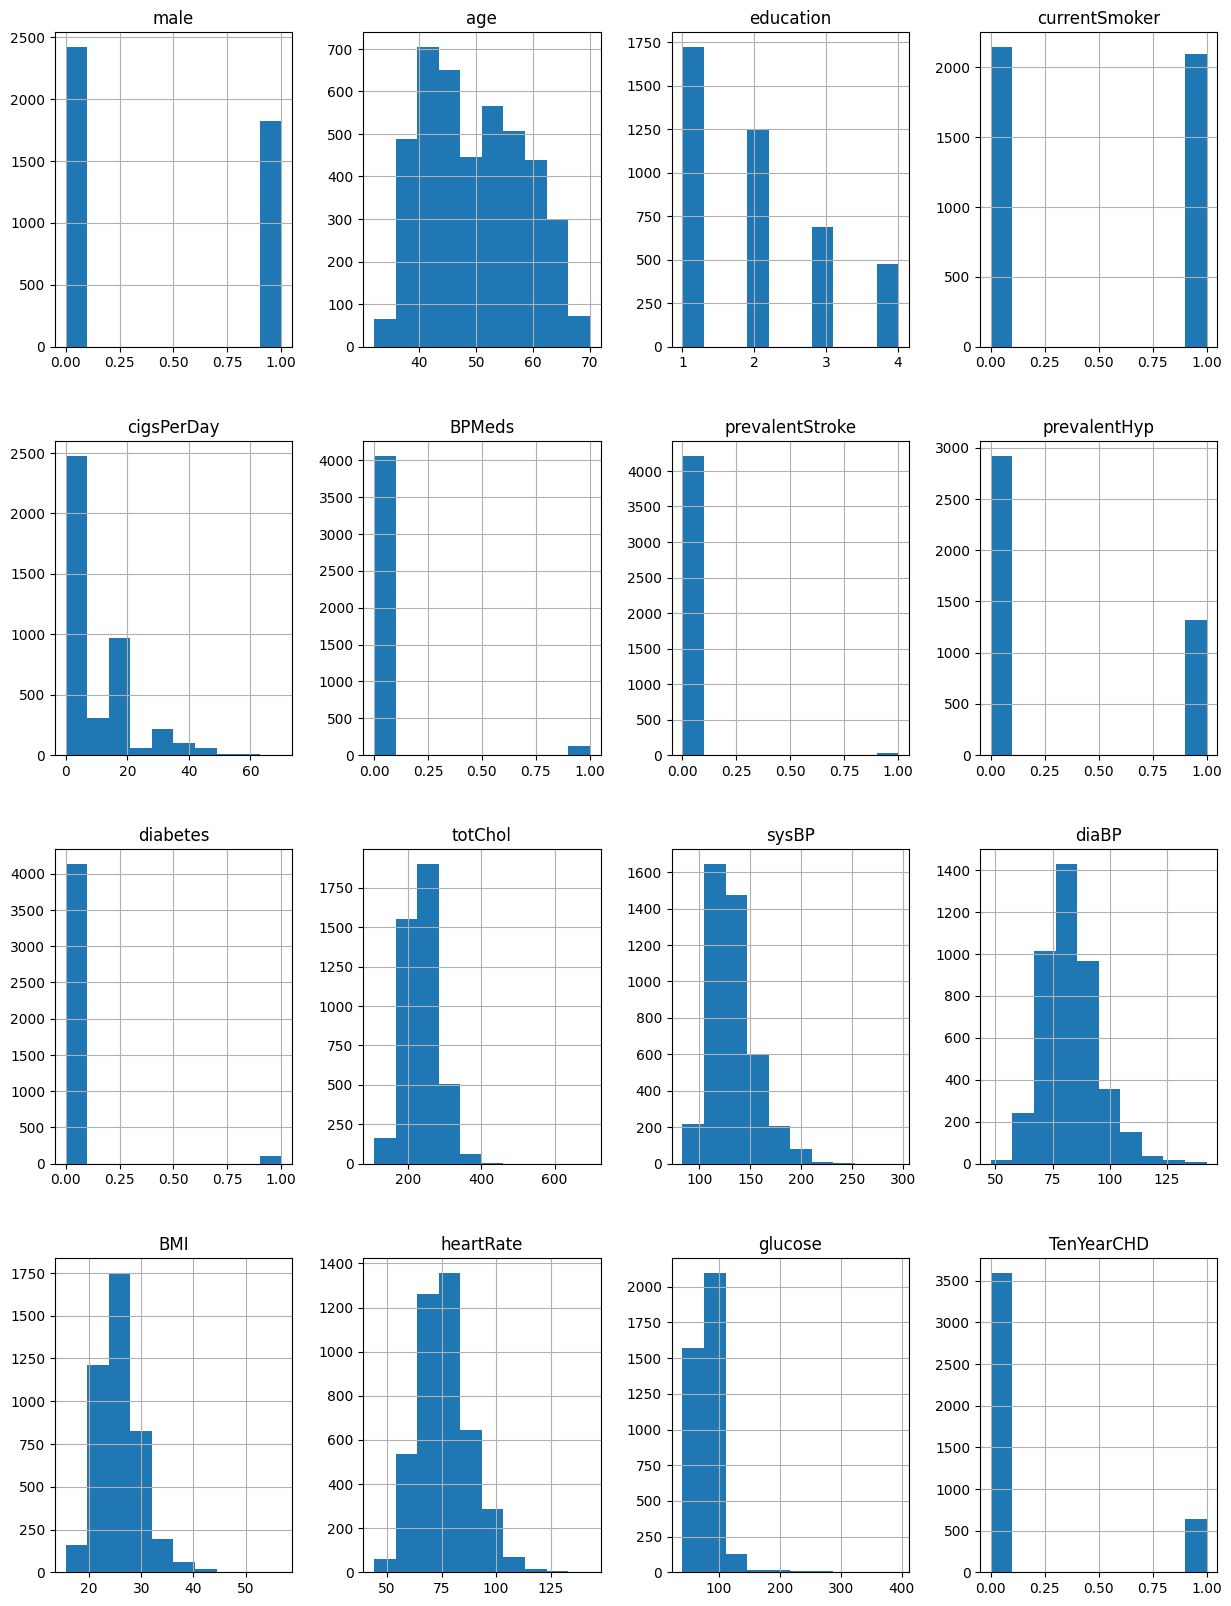

In [7]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

### 直接以圖示顯示資料的相關係數

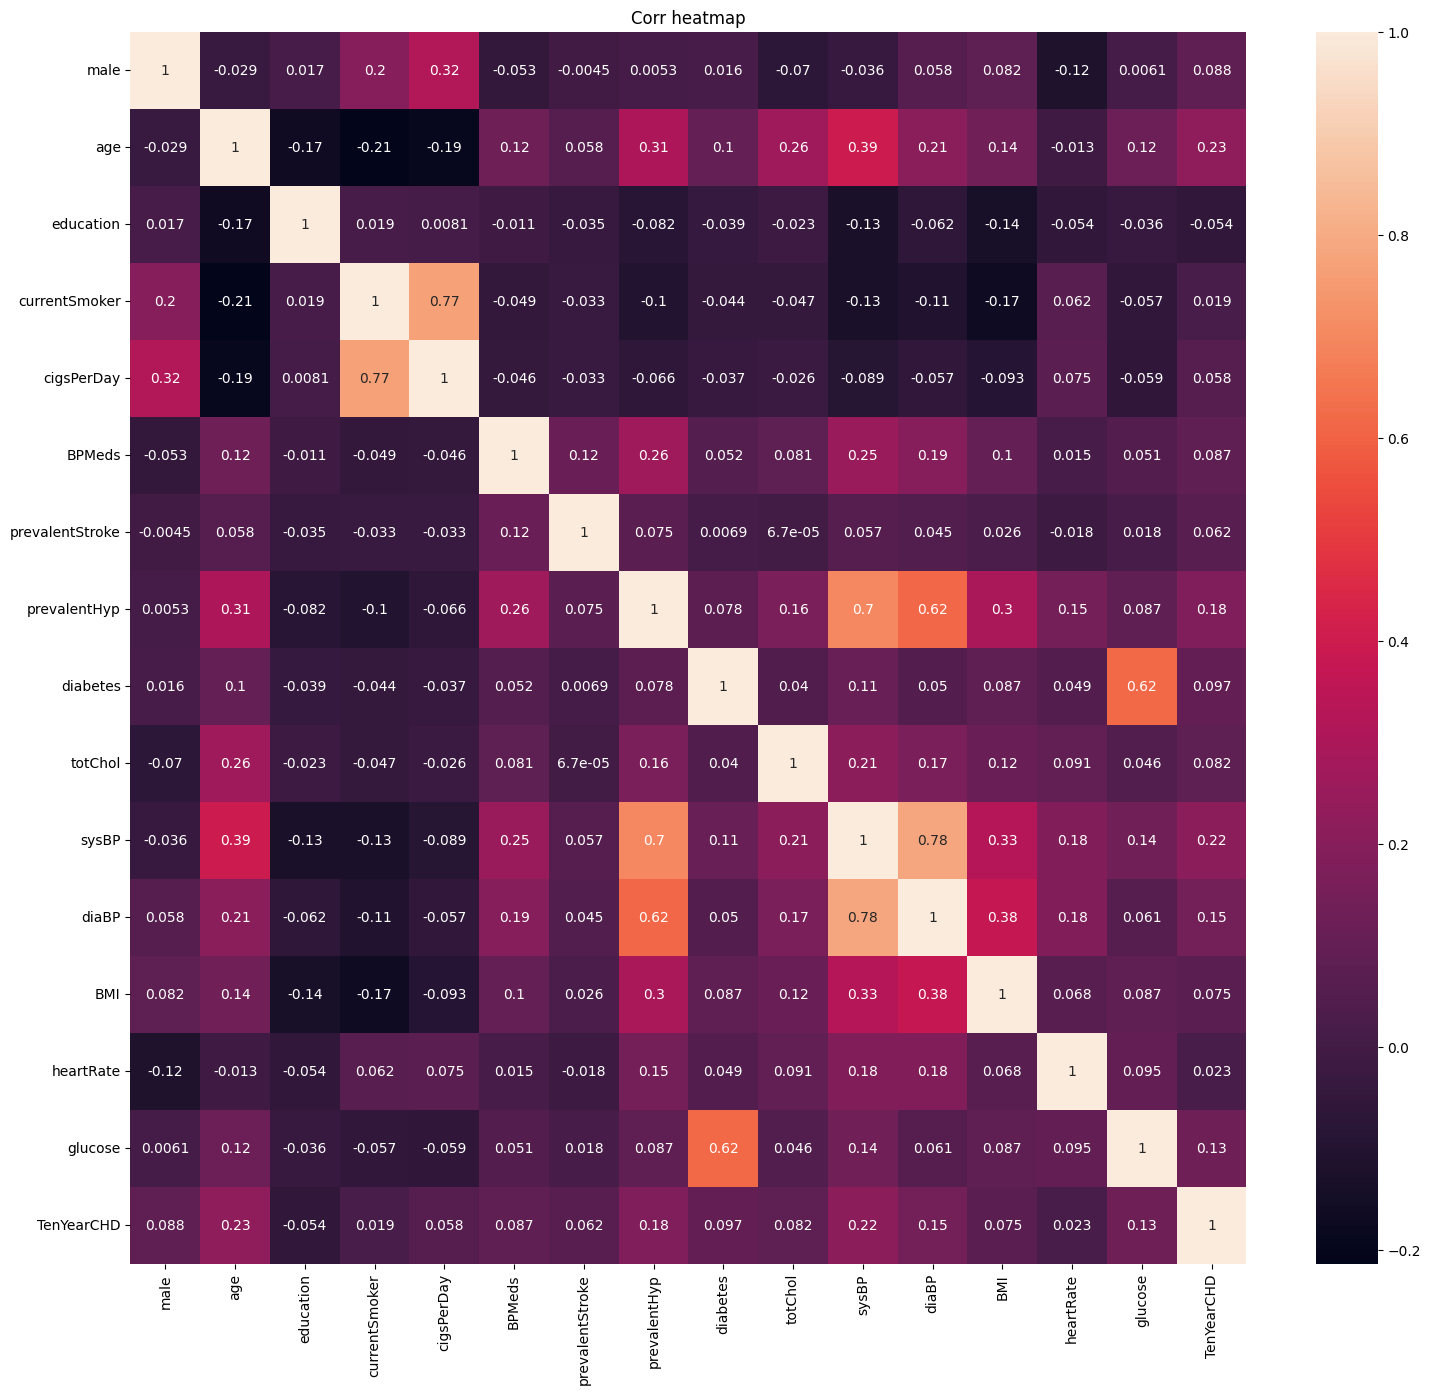

In [8]:
# 使用seaborn的熱度圖觀察表徵之間的線性關聯
# import seaborn as sns
plt.figure(figsize = (18,16))
feature_corr = dataset.corr()
sns.heatmap(feature_corr, annot=True)
plt.title("Corr heatmap")
plt.show()

### 補缺失值

可以發現原始表格資料的 Dtype 全部均為數字，但仍有空值，需要處理。 <br>

In [9]:
# checking for missing values
isna = dataset.isna().sum()
null = dataset[dataset.isna().any(axis=1)]
print(isna)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [10]:
# 顯示具有 null 的資料

print(null)
null

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
14       0   39        2.0              1         9.0     0.0   
21       0   43        1.0              0         0.0     0.0   
26       0   60        1.0              0         0.0     0.0   
33       1   61        NaN              1         5.0     0.0   
36       1   56        NaN              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4208     0   51        1.0              1         9.0     0.0   
4229     0   51        3.0              1        20.0     0.0   
4230     0   56        1.0              1         3.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
14                  0             0         0    226.0  114.0   64.0  22.35   
21                  0             0         0    185.0  123.5

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


查看 TenYearCHD 欄位等於1 且其他欄位有空值的資料

In [11]:
null[null["TenYearCHD"]==1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
193,1,45,3.0,1,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,0,46,2.0,1,20.0,0.0,0,0,0,291.0,124.0,81.0,22.02,78.0,NaN,1
3947,1,52,1.0,1,20.0,0.0,0,1,0,283.0,145.0,79.0,30.12,72.0,NaN,1
3957,1,41,4.0,1,40.0,0.0,0,0,0,254.0,141.0,100.0,27.68,110.0,NaN,1
3979,0,44,3.0,0,0.0,0.0,0,0,0,180.0,120.0,80.0,21.67,60.0,NaN,1


觀察到 education、cigsPerDay、BPMeds、totChol、BMI、heartRate、glucose 皆有缺值。雖然前面提到，對於預測的應變量為1的資料比例很少，但由於資料多，且為度高，評估直接刪除資料列。

In [12]:
# Dropping all rows with missing data
df = dataset.dropna()
print(df.isna().sum()) # 再次確認缺失值


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### 特徵選取 (Feature Selection)

In [13]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 11 best features

           Specs       Score
10         sysBP  669.506552
14       glucose  379.583137
1            age  295.507761
9        totChol  249.153078
4     cigsPerDay  156.567318
11         diaBP  142.878574
7   prevalentHyp   82.967184
8       diabetes   31.027987
5         BPMeds   28.153003
0           male   17.120430
12           BMI   15.730717


In [14]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
print("卡方值排序結果：\n", featureScores)
featureScores

卡方值排序結果：
               Specs       Score
10            sysBP  669.506552
14          glucose  379.583137
1               age  295.507761
9           totChol  249.153078
4        cigsPerDay  156.567318
11            diaBP  142.878574
7      prevalentHyp   82.967184
8          diabetes   31.027987
5            BPMeds   28.153003
0              male   17.120430
12              BMI   15.730717
6   prevalentStroke    8.497823
2         education    7.679797
13        heartRate    2.919062
3     currentSmoker    0.686913


,Specs,Score
10,sysBP,669.506552
14,glucose,379.583137
1,age,295.507761
9,totChol,249.153078
4,cigsPerDay,156.567318
11,diaBP,142.878574
7,prevalentHyp,82.967184
8,diabetes,31.027987
5,BPMeds,28.153003
0,male,17.120430


將題目所列之前三大特徵自變數表格列出如下：

In [15]:
features = fit.transform(X)
print(pd.DataFrame(features, columns = ['age', 'sysBP', 'glucose']))  # column分別對應: age, sysBP, glucose
pd.DataFrame(features, columns = ['age', 'sysBP', 'glucose'])

       age  sysBP  glucose
0     39.0  106.0     77.0
1     46.0  121.0     76.0
2     48.0  127.5     70.0
3     61.0  150.0    103.0
4     46.0  130.0     85.0
...    ...    ...      ...
3651  58.0  141.0     81.0
3652  68.0  168.0     79.0
3653  50.0  179.0     86.0
3654  51.0  126.5     68.0
3655  52.0  133.5    107.0

[3656 rows x 3 columns]


,age,sysBP,glucose
0,39.0,106.0,77.0
1,46.0,121.0,76.0
2,48.0,127.5,70.0
3,61.0,150.0,103.0
4,46.0,130.0,85.0
...,...,...,...
3651,58.0,141.0,81.0
3652,68.0,168.0,79.0
3653,50.0,179.0,86.0
3654,51.0,126.5,68.0


### 卡方值

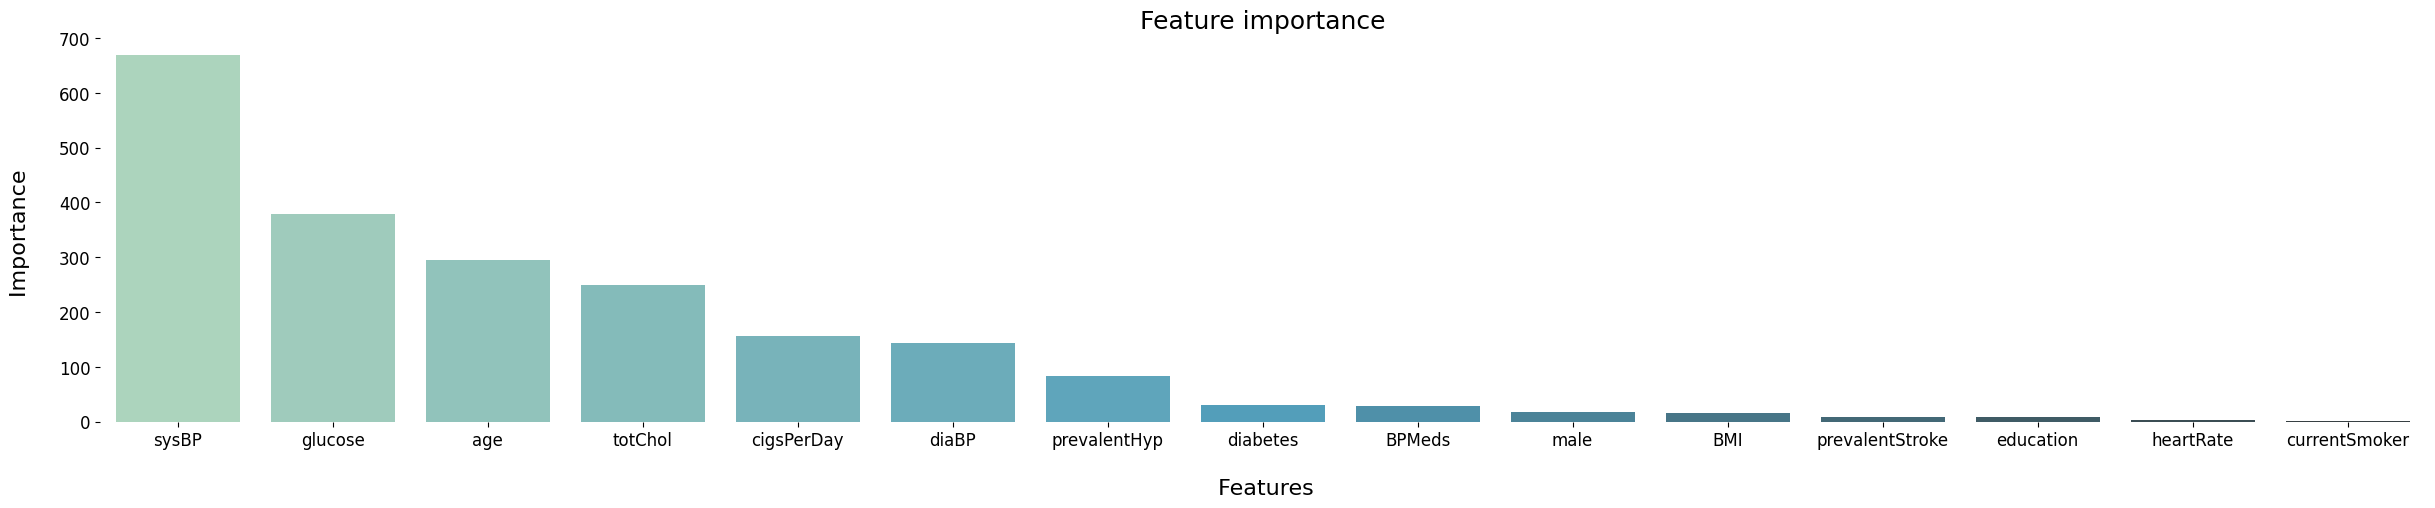

In [16]:
# visualizing feature selection
plt.figure(figsize=(30,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=18)
plt.xlabel('\n Features', fontsize=16)
plt.ylabel('Importance \n', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 結論

由 SelectKBest 方法以卡方統計值觀察表徵之間的線性關聯，可以發現病人10年內罹患心血管疾病最可能的前三大特徵：
1. sysBP
2. glucose
3. age